<a href="https://colab.research.google.com/github/PalemSandeepSrinivas/Insurance-/blob/main/Insurance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import the standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#Read the data
data=pd.read_csv('/content/drive/MyDrive/insurance.csv')
#Print the first five rows
data.head().style.background_gradient(cmap='Reds')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.924000
1,18,male,33.770000,1,no,southeast,1725.552300
2,28,male,33.000000,3,no,southeast,4449.462000
3,33,male,22.705000,0,no,northwest,21984.470610
4,32,male,28.880000,0,no,northwest,3866.855200


In [4]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#Let's print the stastics the data
data.describe().style.background_gradient(cmap='terrain_r')

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#Let's check the null values to the data
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

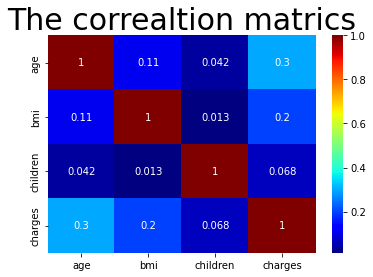

In [7]:
#Let's visualize the correlation matrics
sns.heatmap(data.corr(),annot=True,cmap='jet')
plt.title("The correaltion matrics",fontsize=30)
plt.show()

# Explore data analysis

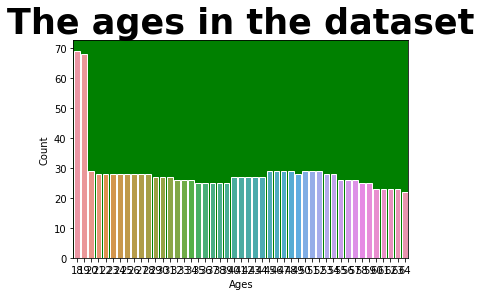

In [8]:
ax=plt.axes()
#Let's intitalize background color
ax.set(facecolor='green')
#Set the figsize with styles
sns.set(rc={'figure.figsize':(18,7)},style='dark')
#Set the title 
ax.set_title("The ages in the dataset",fontsize=35,fontweight='bold')
#Using the cout plot and visualiz the differnet ages
sns.countplot(data['age'])
#On the x-axis Ages
plt.xlabel("Ages")
#On y-axis the values count
plt.ylabel("Count")
#Let's visualize the plot
plt.show()

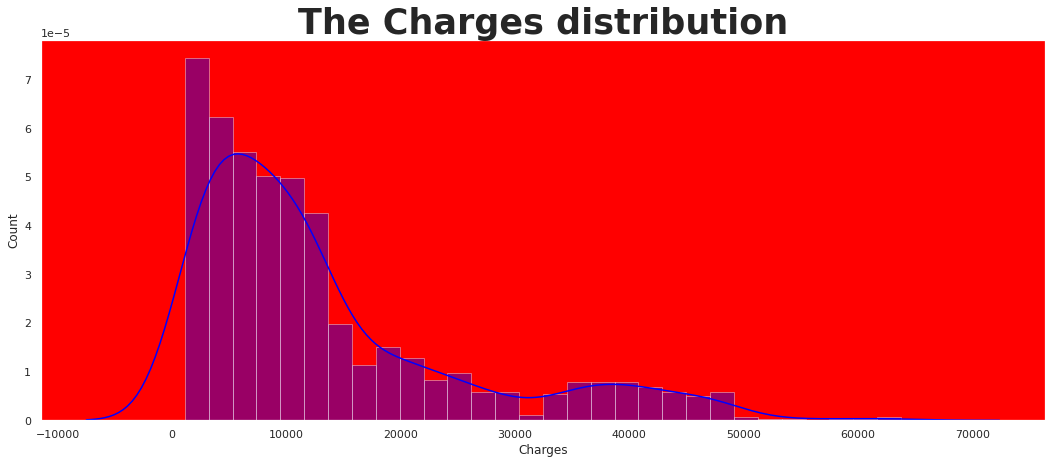

In [9]:
#Let's visualize the charges of the dataset
ax=plt.axes()
#Let's intitalize background color
ax.set(facecolor='red')
#Set the figsize with styles
sns.set(rc={'figure.figsize':(16,8)},style='dark')
#Set the title 
ax.set_title("The Charges distribution",fontsize=35,fontweight='bold')
#Using the cout plot and visualize the charges
sns.distplot(data['charges'],color='blue',hist=True)
#On the x-axis charges
plt.xlabel("Charges")
#On y-axis the values count
plt.ylabel("Count")
#Let's visualize the plot
plt.show()

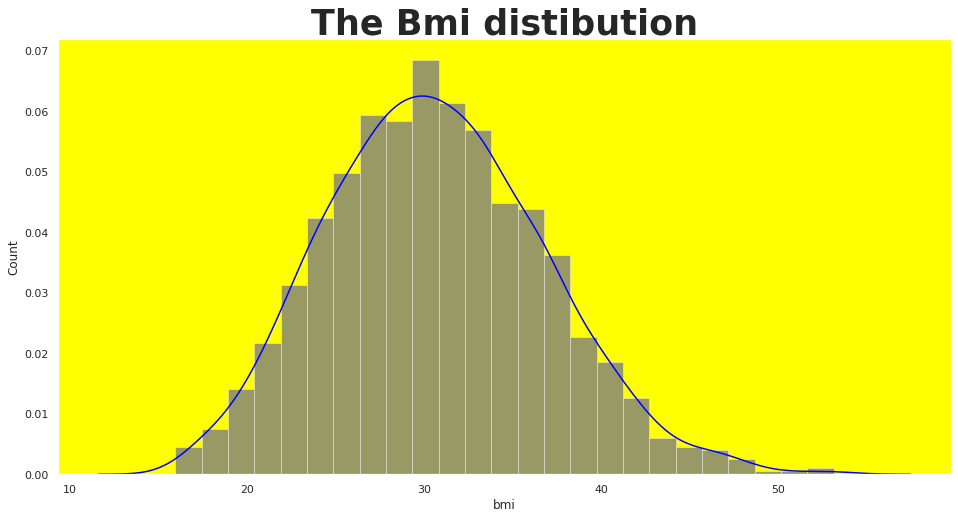

In [10]:
#Let's visualize the bmi of the dataset
ax=plt.axes()
#Let's intitalize background color
ax.set(facecolor='yellow')
#Set the figsize with styles
sns.set(rc={'figure.figsize':(16,8)},style='dark')
#Set the title 
ax.set_title("The Bmi distibution",fontsize=35,fontweight='bold')
#Using the cout plot and visualize the charges
sns.distplot(data['bmi'],color='blue',hist=True,vertical=False,norm_hist=True)
#On the x-axis charges
plt.xlabel("bmi")
#On y-axis the values count
plt.ylabel("Count")
#Let's visualize the plot
plt.show()

In [11]:
#Let's check the which age persons have the most children
children=data.groupby(['children','age']).size().reset_index().rename(columns={0:'Children_with_ages'}).sort_values(by='children',ascending=False)
children.head()

,children,age,Children_with_ages
218,5,52,1
212,5,39,4
206,5,19,1
207,5,20,2
209,5,28,1


In [12]:
#So let's visualize the above data using the plotly 
fig=px.histogram(children,color='children',x='age',title="Let's visualize the which age persons have most children")
fig.update_layout(bargap=0.5,plot_bgcolor='gray',template = "plotly_dark",)
fig.show()

# Observation
1.From the above data we observe the the age between 15-19 and 50-54 ages persons have 5 children

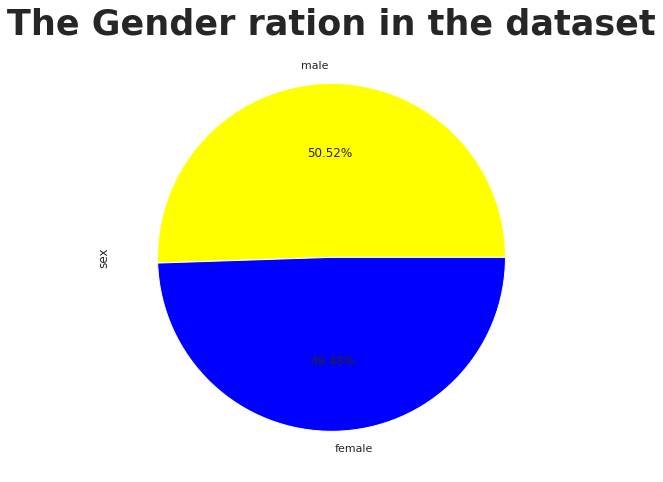

In [13]:
#Let's find the gender ratio on the dataset using the pie chart
gender=data['sex'].value_counts()
#Let's visualize the above data using the pie chart
gender.plot(kind='pie',autopct='%1.2f%%',colors=['yellow','blue'])
#Set the title fontsize and fontweights
plt.title("The Gender ration in the dataset",fontsize=35,fontweight='bold')
#let's visualize the plot
plt.show()

In [14]:
#Visualize the above information with plotly
fig=px.pie(data,names='sex',title="The gender percentage in the dataset")
fig.update_layout(bargap=0.5,plot_bgcolor='lightgreen',template = "plotly")
fig.show()

# Observation
1.From the above data male percentage is high comapre to the female percentage

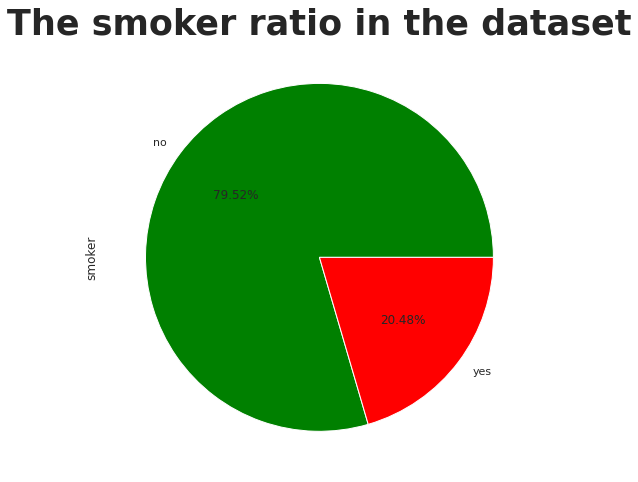

In [15]:
#Alnog with let's visualize the smoke ratio in the dataset
smoker=data['smoker'].value_counts()
#Let's visualize the above data using the pie chart
smoker.plot(kind='pie',autopct='%1.2f%%',colors=['green','red'])
#Set the title
plt.title("The smoker ratio in the dataset",fontsize=35,fontweight='bold')
plt.show()

# Observation
1.From the data the non-smoker percentage is more compare to the smokers

In [16]:
#Let's visualize the which age gender have in the dataset
gender=data.groupby(['age','sex']).size().reset_index().rename(columns={0:'age_gender'}).sort_values(by='age',ascending=False)
gender.head()

,age,sex,age_gender
93,64,male,11
92,64,female,11
91,63,male,11
90,63,female,12
89,62,male,11


In [17]:
#Let's visualize the above data using the plotly
fig=px.histogram(gender,color='sex',x='age',y='age_gender',title="Let's visualize the which age and gender ")
fig.update_layout(bargap=0.5,plot_bgcolor='lightgreen',template = "plotly")
fig.show()

# Observations
1)From the above data age 20-24 and 45-49 is the male persons datasets.
2)According to the data 40-49 and 50-55 ages female have the highest in the dataset

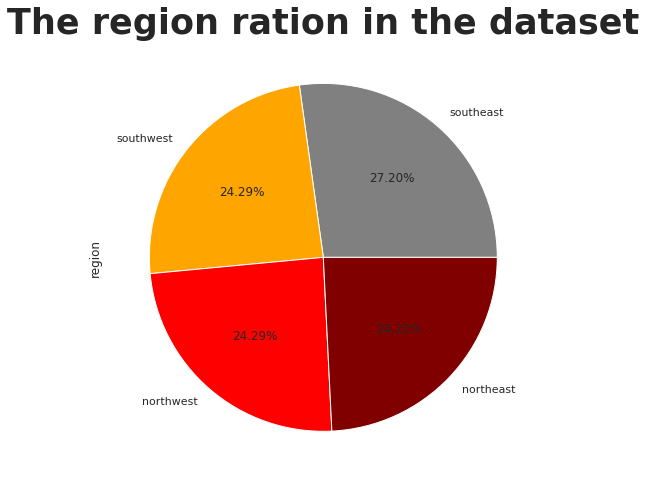

In [18]:
#Let's find the region ratio on the dataset using the pie chart
gender=data['region'].value_counts()
#Let's visualize the above data using the pie chart
gender.plot(kind='pie',autopct='%1.2f%%',colors=['grey','orange','red','maroon'])
#Set the title fontsize and fontweights
plt.title("The region ration in the dataset",fontsize=35,fontweight='bold')
#let's visualize the plot
plt.show()

# Observation
1)Analysis the data the southeast region is hieghst range

In [19]:
#Analysis the data and visualize the which age persons is most smoker
smoker=data.groupby(['age','smoker']).size().reset_index().rename(columns={0:'age_smoker'}).sort_values(by='age',ascending=False)
smoker.head()

,age,smoker,age_smoker
93,64,yes,7
92,64,no,15
91,63,yes,5
90,63,no,18
89,62,yes,4


In [20]:
#To visualize the above data using the using the plotly
fig=px.histogram(smoker,x='age',color='smoker',y='age_smoker',title="Let's visualize the  which age pepole have most smokers ")
fig.update_layout(bargap=0.5,plot_bgcolor='orange',template = "plotly_dark")
fig.show()

# Observations:
1) After analysis the data the most smoker age between the 40-45
2) At the age 50-54 age people most non smokers

In [21]:
#Analysis the data which gender is smoker is more in the data
gender=data.groupby(['sex','smoker']).size().reset_index().rename(columns={0:'gender_smoker'})
gender.head()

,sex,smoker,gender_smoker
0,female,no,547
1,female,yes,115
2,male,no,517
3,male,yes,159


In [22]:
#To analysis the data and visualize the some data points using the plotly bargraph
fig=px.histogram(gender,y='gender_smoker',color='smoker',x='sex',title="Let's visualize the which gender is smoker")
fig.update_layout(bargap=0.5,plot_bgcolor='gray',template = "plotly_dark")
fig.show()

# Observations:
1)To analysis the above data male gender is more smoker
2)And The non-smoker female gender si more

In [23]:
# To analysis the data which region peopel is more smoker
region=data.groupby(['region','smoker']).size().reset_index().rename(columns={0:'region_smoker'}).sort_values(by='region_smoker',ascending=False)
region.head()

,region,smoker,region_smoker
4,southeast,no,273
2,northwest,no,267
6,southwest,no,267
0,northeast,no,257
5,southeast,yes,91


In [24]:
#To analysis the data and visualize the some data points using the plotly bargraph
fig=px.histogram(region,y='region_smoker',color='smoker',x='region',title="Let's visualize the which region is most smoker")
fig.update_layout(bargap=0.5,plot_bgcolor='pink',template = "plotly_dark")
fig.show()

# Observation
1)Analysis the data the most smoker is region is southeast after that northeast
2)Same as non-smoker region is southeast

In [25]:
#To visualize the which region people have more children by using the above data
region=data.groupby(['region','children']).size().reset_index().rename(columns={0:'region_wise_children'}).sort_values(by='children',ascending=False)
region.head()

,region,children,region_wise_children
23,southwest,5,8
17,southeast,5,6
11,northwest,5,1
5,northeast,5,3
22,southwest,4,7


In [26]:
# To visualize the above information using the plotly 
fig=px.histogram(region,y='region_wise_children',color='children',x='region',title="Let's visualize the which region people have the most region")
fig.update_layout(bargap=0.5,plot_bgcolor='grey',template = "plotly_dark")
fig.show()

# # Observation:

In [27]:
#Analysis the data which gender is most is the body mass index
bmi=data.groupby(['sex','bmi']).size().reset_index().rename(columns={0:'gender_bmi'}).sort_values(by='bmi',ascending=False)
bmi.head()

,sex,bmi,gender_bmi
791,male,53.13,1
790,male,52.58,1
789,male,50.38,1
788,male,49.06,1
400,female,48.07,1


In [28]:
#To visualize the above data using the plotly and see the bmi per genders
fig=px.histogram(bmi,color='sex',x='bmi',title="Let's visualize the gender with body mass index",histnorm='probability')
fig.update_layout(bargap=0.5,plot_bgcolor='yellow',template = "plotly_dark",paper_bgcolor='green')
fig.show()

# Analysis

# Model buliding Process

In [29]:
#Let's convert the categorical data to numerical data using the labelencoder 
#import the labelencoder using the sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler
#intialize the labbel encoder with variabel
label=LabelEncoder()
stand=StandardScaler()
#Let's check the mean_squred_errot and r2 score
from sklearn.metrics import mean_squared_error,r2_score

In [30]:
#Print the columns in the dataset
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [31]:
#Let's use the label encoder
data['sex']=label.fit_transform(data['sex'])
data['smoker']=label.fit_transform(data['smoker'])
data['region']=label.fit_transform(data['region'])

In [32]:
#Let's divided the data into traing and testing
X=data.drop(['charges'],axis=1)
y=data['charges']

In [33]:
#Using the 30% from the test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
#intialize the LinearRegression 
linear=LinearRegression(fit_intercept=False,
    normalize='deprecated',
    copy_X=True,
    n_jobs=10,
    positive=False)
#Fit the data to the model
linear.fit(X_train,y_train)

LinearRegression(fit_intercept=False, n_jobs=10)

In [35]:
#To predict the predictoions from the linearregression
y_pred=linear.predict(X_test)
#prediction
y_pred

array([11011.66177003,  8583.12756214, 37227.57144727, 10326.48239788,
       27712.98675899,  7507.40159149,  4683.88980625, 14120.93576235,
        6706.0495686 , 11107.88808665, 29125.32575935,  9393.4369589 ,
        6835.52956987, 33909.42525797, 36105.64069297, 33724.79683067,
       11860.41829289, 34026.30236783, 10214.00401439, 32944.63440793,
        5346.92963773,  8942.17448287,  3536.22886536,  6778.64801521,
       11905.77104008, 12894.80841007, 12795.50588814,  7346.20558887,
       11501.60450679,  3804.75326722,  9151.57698202, 12969.98696489,
        5315.68098413,  7356.3979492 ,  5133.09268514, 10842.73266114,
        4532.82795041,  9221.22588057, 34813.80853583, 31073.776153  ,
        5020.5856677 ,  5369.90744319, 12212.25868506, 12384.67150052,
        7571.4842228 , 11719.48552696,  6116.22759982,  5612.21463016,
       32930.25041778,  7315.5827089 , 13963.8869075 ,  3952.66876209,
       10247.52488896,  4548.47720218, 11801.82534868, 11803.93818451,
      

In [36]:
#Let's prnt the test score is for the linear regression model
print(f'The linear regression model test score is {linear.score(X_test,y_test)*100:.2f}')
#Print the train score for linear regression model
print(f'The linear regression model train score is {linear.score(X_train,y_train)*100:.2f}')

The linear regression model test score is 74.51
The linear regression model train score is 71.18


In [37]:
#Let's check the mean_squard_error and r2 score
print(f'The mean_squard_error is {mean_squared_error(y_test,y_pred)}')
#print the r2_score
print(f'The mean_squard_error is {r2_score(y_test,y_pred)}')

The mean_squard_error is 37375724.26907292
The mean_squard_error is 0.74509189638555


Text(0, 0.5, 'Predictions')

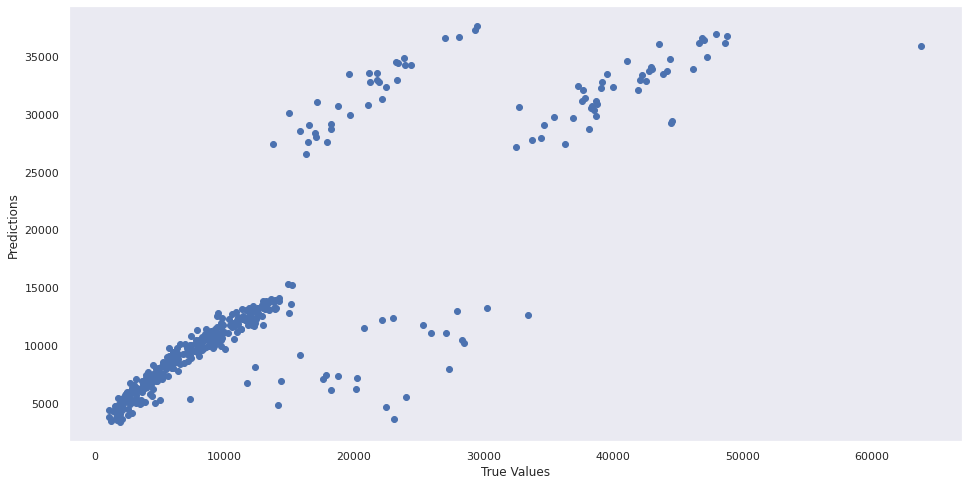

In [38]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [39]:
#To install the decisiontree regressor model
from sklearn.tree import DecisionTreeRegressor
#intailze the model
tree=DecisionTreeRegressor(criterion='absolute_error',
    splitter='best',
    max_depth=10,ccp_alpha=0.1,max_features=5,random_state=42)
#Let's fit the model
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.1, criterion='absolute_error', max_depth=10,
                      max_features=5, random_state=42)

In [40]:
#predict the prediction using the data
tree_pred=tree.predict(X_test)
#prediction
tree_pred

array([ 8605.350525,  5377.4578  , 28950.4692  ,  8527.532   ,
       36898.73308 , 11326.71487 ,  2556.83465 , 14410.9321  ,
        3353.4703  , 10527.21875 , 17496.306   ,  6600.361   ,
        4454.40265 , 46113.511   , 48970.2476  , 40419.0191  ,
       10527.21875 , 41676.0811  ,  8556.907   , 21348.706   ,
        4504.6624  ,  8215.15205 ,  1253.1715  ,  2741.948   ,
       10527.21875 , 10386.998425, 21075.991935,  4618.0799  ,
        9225.2564  ,  1137.24035 ,  7682.67    , 11840.77505 ,
        2020.177   ,  5708.867   ,  3410.324   , 12797.20962 ,
        2020.177   ,  7630.3568  , 24593.8415  , 39937.518275,
        4872.844925,  2362.22905 , 12038.334   , 12323.936   ,
        5787.96145 , 12921.39175 , 26018.95052 ,  4247.8355  ,
       40987.7534  ,  4679.89045 , 13887.9685  ,  1718.28955 ,
        7443.64305 ,  1646.4297  , 10886.298   , 10527.21875 ,
        3756.6216  , 43943.8761  , 11845.0969  , 10355.641   ,
       13887.9685  ,  4058.1161  , 36580.28216 ,  7684.

In [41]:
#Let's prnt the test score is for the decisiontree regression model
print(f'The decisiontree regression model test score is {tree.score(X_test,y_test)*100:.2f}')
#Print the train score for decisiontree regression model
print(f'The decisiontree regression model train score is {tree.score(X_train,y_train)*100:.2f}')

The decisiontree regression model test score is 76.08
The decisiontree regression model train score is 95.74


In [42]:
#Let's check the mean_squard_error and r2 score
print(f'The mean_squard_error is {mean_squared_error(y_test,tree_pred)}')
#print the r2_score
print(f'The mean_squard_error is {r2_score(y_test,tree_pred)}')

The mean_squard_error is 35074606.951686166
The mean_squard_error is 0.7607858652126583


In [43]:
#import the randomforesttree regressor
from sklearn.ensemble import RandomForestRegressor
#intalize the model
random=RandomForestRegressor(n_estimators=700,criterion='poisson',n_jobs=10)
#Let's fit the data to random forest
random.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', n_estimators=700, n_jobs=10)

In [44]:
#Randomforest regressor prediction
random_pred=random.predict(X_test)
#prediction
random_pred

array([ 9095.52183124,  5354.36936121, 35863.29083889,  9680.59643846,
       39649.30579803,  8549.51788533,  2153.03195446, 14780.54231991,
        5451.05479353, 10824.33415894, 19790.33654684,  7157.07484411,
        4055.39032181, 45412.54925779, 48338.34227919, 44889.29373056,
       12177.86101516, 42772.31777077,  9317.36737866, 24915.11342973,
        8596.57816239,  8490.16786017,  1411.60220737,  2780.0041858 ,
       12550.72846761, 12652.49971637, 18789.39575441,  5000.84281739,
       10868.87148681,  3000.0138752 ,  8480.06225426, 11669.94774443,
        2619.6804177 ,  5923.34054394,  3737.68903966, 13256.29353409,
        4615.69286969,  7891.93744354, 24474.60339871, 40114.91850197,
        7290.51688004,  3259.95352906, 12779.93424031, 13027.45696593,
        5596.34119829, 14913.40857583, 17370.39409154, 11074.65937139,
       42519.3473762 ,  6328.51659299, 14203.51304937,  2558.71896429,
        6643.26318466,  1873.38812401, 11063.13936189, 12116.10049684,
      

In [45]:
#Let's prnt the test score is for the decisiontree regression model
print(f'The decisiontree regression model test score is {random.score(X_test,y_test)*100:.2f}')
#Print the train score for decisiontree regression model
print(f'The decisiontree regression model train score is {random.score(X_train,y_train)*100:.2f}')

The decisiontree regression model test score is 83.32
The decisiontree regression model train score is 97.36


In [46]:
#Let's check the mean_squard_error and r2 score
print(f'The mean_squard_error is {mean_squared_error(y_test,random_pred)}')
#print the r2_score
print(f'The mean_squard_error is {r2_score(y_test,random_pred)}')

The mean_squard_error is 24455045.834032144
The mean_squard_error is 0.8332128813750954


In [47]:
#intialize the Xgbregressor
from xgboost import XGBRegressor
#import the model
xgboost=XGBRegressor()

In [48]:
# create an xgboost regression model
model = XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
#fit the data to train data
model.fit(X_train,y_train)

[16:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=500)

In [49]:
#Make prediction on the test data
model_pred=model.predict(X_test)
#prediction
model_pred

array([10703.593  ,  6770.639  , 32540.082  ,  9324.199  , 32675.207  ,
        4716.862  ,  1535.3035 , 15314.802  ,  2467.8767 , 10192.931  ,
       18436.143  ,  7976.559  ,  4406.5054 , 45347.703  , 46415.39   ,
       44171.008  , 10450.802  , 44634.46   ,  8857.713  , 24295.79   ,
        6543.3276 ,  8185.6655 ,   360.28967,  3391.4248 , 12977.829  ,
       12816.93   , 15079.035  ,  6203.1333 ,  9931.783  ,  4522.512  ,
        7085.521  , 13442.125  ,  2260.3389 ,  5015.8706 ,  3953.2622 ,
       10483.692  ,  2074.434  ,  7832.133  , 27039.172  , 39777.76   ,
        4932.0757 ,  4841.742  , 13126.709  , 14956.285  ,  6416.0273 ,
       16185.651  ,  7825.363  ,  9134.778  , 43251.926  ,  5596.961  ,
       12675.299  ,  1903.3668 ,  5684.4414 ,   959.0669 , 10891.477  ,
       12564.289  ,  4451.677  , 40006.383  , 10965.483  , 12255.585  ,
       15672.559  ,  5673.3647 , 16480.42   ,  8669.044  , 11197.458  ,
        6373.8247 , 14866.574  , 11350.342  ,  5022.067  ,  1692

In [50]:
#Let's prnt the test score is for the xgboost regression model
print(f'The xgboost regression model test score is {model.score(X_test,y_test)*100:.2f}')
#Print the train score for xgboost regression model
print(f'The xgboost regression model train score is {model.score(X_train,y_train)*100:.2f}')

The xgboost regression model test score is 84.80
The xgboost regression model train score is 94.98


In [51]:
#Let's check the mean_squard_error and r2 score
print(f'The mean_squard_error is {mean_squared_error(y_test,model_pred)}')
#print the r2_score
print(f'The mean_squard_error is {r2_score(y_test,model_pred)}')

The mean_squard_error is 22289068.33242669
The mean_squard_error is 0.8479851761788292


In [52]:
#import the Ridge algorithm
from sklearn.linear_model import Ridge
#intaize the Ridge algorithm
ridge=Ridge(solver='lsqr')
#And fit the data to train data
ridge.fit(X_train,y_train)

Ridge(solver='lsqr')

In [53]:
#Let's prnt the test score is for the decisiontree regression model
print(f'The decisiontree regression model test score is {ridge.score(X_test,y_test)*100:.2f}')
#Print the train score for decisiontree regression model
print(f'The decisiontree regression model train score is {ridge.score(X_train,y_train)*100:.2f}')

The decisiontree regression model test score is 76.92
The decisiontree regression model train score is 74.22


In [54]:
#install the graident boost method
from sklearn.ensemble import GradientBoostingRegressor
#intalize the gradientboostingregressor
model=GradientBoostingRegressor(loss='huber',
    n_estimators=300,alpha=0.3,criterion='mse',random_state=120)
#Let fit the train data to the model
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.3, criterion='mse', loss='huber',
                          n_estimators=300, random_state=120)

In [55]:
#Make the prediction on the test data
gradient_pred=model.predict(X_test)
#Prediction
gradient_pred

array([ 8923.43536197,  5428.06713652, 29906.45429477,  9124.66856283,
       34943.34646908,  4548.9829858 ,  2089.15694552, 14557.29575877,
        3488.94834655, 10316.36026666, 17805.30406312,  7170.02651059,
        3996.93441549, 45978.59083537, 49042.3896801 , 42110.89050599,
        9819.88972533, 40007.39519501,  8197.68263265, 23795.02006894,
        4960.62679421,  7826.71607359,  1183.34933333,  2633.39515479,
       11049.58627459, 11106.93615497, 13110.68194079,  4909.28833798,
        9547.3751688 ,  1196.78099999,  8060.18483107, 11755.61358153,
        2022.37231302,  5928.11933193,  2997.06283845,  8002.93092341,
        2670.87121344,  7670.51807609, 21621.7091446 , 39837.40771338,
        4633.8181803 ,  2639.56017872, 11727.33501118, 12385.83801619,
        5097.21086115, 12797.77854775,  3504.75167667,  4331.70863724,
       42407.98184465,  4551.07211959, 13888.98549316,  1873.87216633,
        6903.70049614,  1716.09710634, 10641.4208823 , 10250.8306927 ,
      

In [56]:
#Let's print the test score is for the gradientboosting regression model
print(f'The gradientboosting regression model test score is {model.score(X_test,y_test)*100:.2f}')
#Print the train score for gradientboosting regression model
print(f'The gradientboosting regression model train score is {model.score(X_train,y_train)*100:.2f}')

The gradientboosting regression model test score is 86.54
The gradientboosting regression model train score is 85.58


In [57]:
#Let's check the mean_squard_error and r2 score
print(f'The mean_squard_error is {mean_squared_error(y_test,gradient_pred)}')
#print the r2_score
print(f'The mean_squard_error is {r2_score(y_test,gradient_pred)}')

The mean_squard_error is 19739668.547696024
The mean_squard_error is 0.8653724690591579


# The final output

In [58]:
#Let's prnt the test score is for the linear regression model
print(f'The linear regression model test score is {linear.score(X_test,y_test)*100:.2f}')
#Print the train score for linear regression model
print(f'The linear regression model train score is {linear.score(X_train,y_train)*100:.2f}')
#Let's check the mean_squard_error and r2 score
print(f'The mean_squard_error is {mean_squared_error(y_test,y_pred)}')
#print the r2_score
print(f'The mean_squard_error is {r2_score(y_test,y_pred)}')
#Let's prnt the test score is for the decisiontree regression model
print(f'The decisiontree regression model test score is {tree.score(X_test,y_test)*100:.2f}')
#Print the train score for decisiontree regression model
print(f'The decisiontree regression model train score is {tree.score(X_train,y_train)*100:.2f}')
#Let's check the mean_squard_error and r2 score
print(f'The mean_squard_error is {mean_squared_error(y_test,tree_pred)}')
#print the r2_score
print(f'The mean_squard_error is {r2_score(y_test,tree_pred)}')
#Let's prnt the test score is for the decisiontree regression model
print(f'The decisiontree regression model test score is {random.score(X_test,y_test)*100:.2f}')
#Print the train score for decisiontree regression model
print(f'The decisiontree regression model train score is {random.score(X_train,y_train)*100:.2f}')
#Let's check the mean_squard_error and r2 score
print(f'The mean_squard_error is {mean_squared_error(y_test,random_pred)}')
#print the r2_score
print(f'The mean_squard_error is {r2_score(y_test,random_pred)}')
#Let's prnt the test score is for the xgboost regression model
print(f'The xgboost regression model test score is {model.score(X_test,y_test)*100:.2f}')
#Print the train score for xgboost regression model
print(f'The xgboost regression model train score is {model.score(X_train,y_train)*100:.2f}')
#Let's check the mean_squard_error and r2 score
print(f'The mean_squard_error is {mean_squared_error(y_test,model_pred)}')
#print the r2_score
print(f'The mean_squard_error is {r2_score(y_test,model_pred)}')
#Let's print the test score is for the gradientboosting regression model
print(f'The gradientboosting regression model test score is {model.score(X_test,y_test)*100:.2f}')
#Print the train score for gradientboosting regression model
print(f'The gradientboosting regression model train score is {model.score(X_train,y_train)*100:.2f}')
#Let's check the mean_squard_error and r2 score
print(f'The mean_squard_error is {mean_squared_error(y_test,gradient_pred)}')
#print the r2_score
print(f'The mean_squard_error is {r2_score(y_test,gradient_pred)}')

The linear regression model test score is 74.51
The linear regression model train score is 71.18
The mean_squard_error is 37375724.26907292
The mean_squard_error is 0.74509189638555
The decisiontree regression model test score is 76.08
The decisiontree regression model train score is 95.74
The mean_squard_error is 35074606.951686166
The mean_squard_error is 0.7607858652126583
The decisiontree regression model test score is 83.32
The decisiontree regression model train score is 97.36
The mean_squard_error is 24455045.834032144
The mean_squard_error is 0.8332128813750954
The xgboost regression model test score is 86.54
The xgboost regression model train score is 85.58
The mean_squard_error is 22289068.33242669
The mean_squard_error is 0.8479851761788292
The gradientboosting regression model test score is 86.54
The gradientboosting regression model train score is 85.58
The mean_squard_error is 19739668.547696024
The mean_squard_error is 0.8653724690591579


# Thank you